In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline
sb.set()

In [50]:
df_auto = pd.read_csv("C:\\users\\abhijit.a.pande\\machine learning\\datasets\\auto-mpg.csv")

In [51]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [52]:
df_auto = df_auto.drop("car name", axis = 1)

In [53]:
df_auto["origin"] = df_auto["origin"].replace({1:"america", 2:"europe", 3:"asia"})

In [54]:
country_dummy = pd.get_dummies(df_auto["origin"],drop_first=True)

In [55]:
df_auto = pd.concat([df_auto, country_dummy], axis = 1)

In [56]:
df_auto = df_auto.drop("origin", axis = 1)

In [57]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,asia,europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [58]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
asia            398 non-null uint8
europe          398 non-null uint8
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [59]:
df_auto[(df_auto["horsepower"].str.isdigit())]["horsepower"].median()

93.5

In [60]:
def updhp(hp):
    if not hp.isdigit():
        return df_auto[df_auto["horsepower"].str.isdigit()]["horsepower"].median()
    else:
        return hp

df_auto["horsepower"].apply(updhp)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [61]:
df_auto["horsepower"] = df_auto["horsepower"].apply(updhp)

In [65]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
asia            398 non-null uint8
europe          398 non-null uint8
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


In [64]:
df_auto["horsepower"] = df_auto["horsepower"].astype("float64")

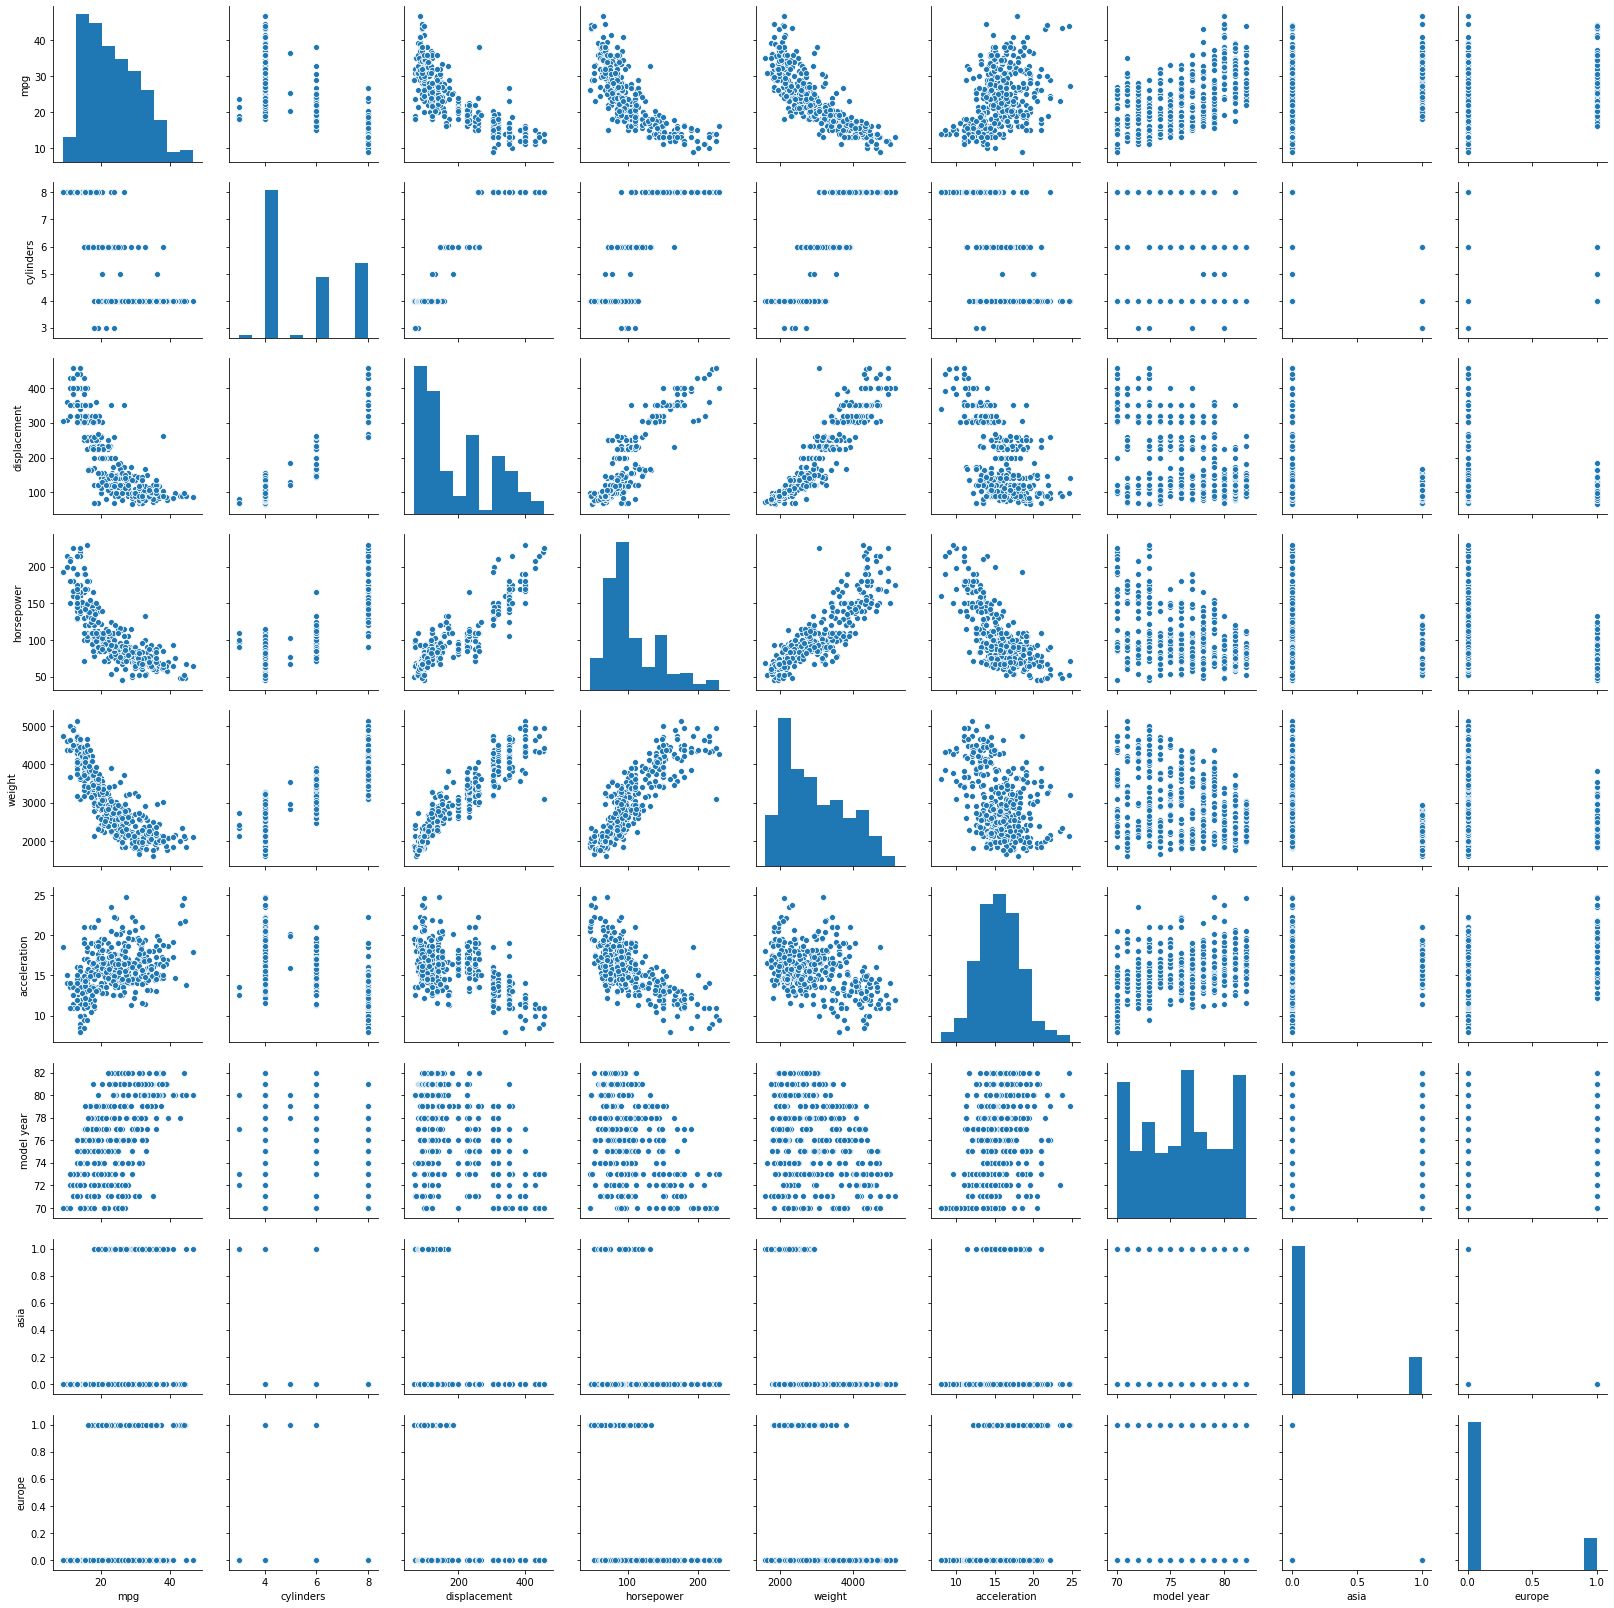

In [66]:
sb.pairplot(df_auto)

In [68]:
y = df_auto["mpg"]

In [70]:
x = df_auto.drop("mpg", axis = 1)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [72]:
lm = LinearRegression()

In [73]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
for idx, col_name in enumerate(x_train.columns): 
    print (col_name, " ", lm.coef_[idx])

cylinders   -0.4638920488457684
displacement   0.026212885230149273
horsepower   -0.01868595293726524
weight   -0.007038534685512781
acceleration   0.06396413085512598
model year   0.793987071592005
asia   2.8728574718938598
europe   2.6142754618554465


In [78]:
lm.score(x_train, y_train)

0.8188580413818985

In [79]:
lm.score(x_test, y_test)

0.8367844516834182

In [81]:
lm.intercept_

-18.610956737476087

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly  = PolynomialFeatures(degree = 2, interaction_only=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly = LinearRegression()
poly.fit(x_train2, y_train)
y_pred = poly.predict(x_test2)

print(poly.score(x_train2, y_train))
print(poly.score(x_test2, y_test))

0.9021980289440351
0.8857450712838105


In [87]:
((np.var([4,5,8,10,11]) ** 0.5) * (np.var([50,48,45,42,41]))**0.5)/(np.std([4,5,8,10,11]) * np.std([50,48,45,42,41]))

1.0